#Introdução ao Pandas: Trabalhando com DataFrames

* O que são DataFrames?

* Criação e manipulação de DataFrames

* Como carregar arquivos CSV com Pandas.





Os DataFrames são estruturas fundamentais da biblioteca Pandas, funcionando como uma tabela bidimensional onde:

* As linhas representam registros/observações
* As colunas representam diferentes variáveis/campos

* Podem conter diferentes tipos de dados (números, texto, datas, etc.)

São semelhantes a planilhas do Excel ou tabelas SQL

In [ ]:
#Exemplo prático de um DataFrame:
import pandas as pd

# Criando um DataFrame simples
dados = {
    'Nome': ['Ana', 'João', 'Maria'],
    'Idade': [25, 30, 28],
    'Cidade': ['São Paulo', 'Rio', 'Curitiba']
}

df = pd.DataFrame(dados)
display(df)

,Nome,Idade,Cidade
0,Ana,25,São Paulo
1,João,30,Rio
2,Maria,28,Curitiba



1. Operações básicas com DataFrames
2. Métodos de seleção e filtragem
3. Manipulação de dados
4. Importação/exportação de dados

In [ ]:
# 1. Operações Básicas com DataFrames:

dados = {
    'Nome': ['Ana', 'João', 'Maria', 'Pedro'],
    'Idade': [25, 30, 25, 35],
    'Salário': [3500, 4200, 3800, 5000]
}
df = pd.DataFrame(dados)

# Informações básicas
display(df)
print(df.shape)  # Dimensões (linhas, colunas)
print('\n ---------\n')
print(df.info())  # Informações gerais
print('\n ---------\n')
print(df.describe())  # Estatísticas descritivas

,Nome,Idade,Salário
0,Ana,25,3500
1,João,30,4200
2,Maria,25,3800
3,Pedro,35,5000


(4, 3)

 ---------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Nome     4 non-null      object
 1   Idade    4 non-null      int64 
 2   Salário  4 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 228.0+ bytes
None

 ---------

           Idade  Salário
count   4.000000      4.0
mean   28.750000   4125.0
std     4.787136    650.0
min    25.000000   3500.0
25%    25.000000   3725.0
50%    27.500000   4000.0
75%    31.250000   4400.0
max    35.000000   5000.0


Explicação de cada linha da saída:

* count: Número total de valores não-nulos na coluna
Mostra quantas observações válidas existem
* mean: Média aritmética dos valores
Soma de todos os valores dividida pelo count
* std: Desvio padrão
Medida de dispersão que indica quanto os valores variam em relação à média
* min: Valor mínimo
O menor valor encontrado na coluna
* 25%: Primeiro quartil (Q1)
25% dos dados estão abaixo deste valor
* 50%: Segundo quartil/mediana
Valor central do conjunto de dados
* 75%: Terceiro quartil (Q3)
75% dos dados estão abaixo deste valor
* max: Valor máximo
O maior valor encontrado na coluna


Exemplo prático interpretando a saída:

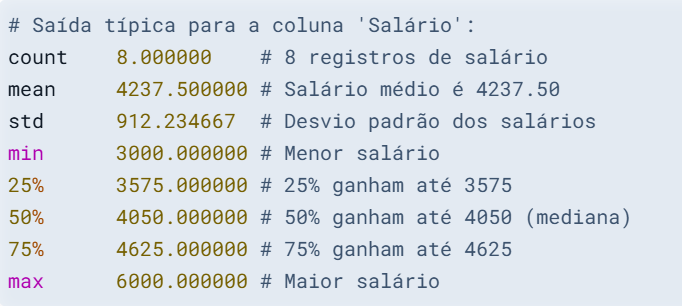

In [ ]:
# 2.Seleção e Filtragem:

print('Tabela completa')
display(df)
print('\n\n\n')

# Selecionando colunas
print('seleção por coluna')
nomes = df['Nome']
display(nomes)
print('\n')
dados_parciais = df[['Nome', 'Idade']]
display(dados_parciais)
print('\n\n\n')

# Filtrando dados
print('Filtragem por criterios')
maiores_30 = df[df['Idade'] > 30]
display(maiores_30)
print('\n')
salario_alto = df[df['Salário'] >= 4000]
display(salario_alto)
print('\n\n\n')

# Loc e iLoc
print('Acessando valores diretamente')
primeira_linha = df.loc[0]  # Por índice label
display(primeira_linha)
segunda_linha = df.iloc[1]  # Por índice posicional
display(segunda_linha)
print(df.loc[1, 'Nome']) # um usa o label
print(df.iloc[1, 0]) # outro usa a posicao relativa na tabela

Tabela completa


,Nome,Idade,Salário
0,Ana,25,3500
1,João,30,4200
2,Maria,28,3800
3,Pedro,35,5000






seleção por coluna


,Nome
0,Ana
1,João
2,Maria
3,Pedro


,Nome,Idade
0,Ana,25
1,João,30
2,Maria,28
3,Pedro,35






Filtragem por criterios


,Nome,Idade,Salário
3,Pedro,35,5000


,Nome,Idade,Salário
1,João,30,4200
3,Pedro,35,5000






Acessando valores diretamente


,0
Nome,Ana
Idade,25
Salário,3500


,1
Nome,João
Idade,30
Salário,4200


João
João


In [ ]:
# 3. Manipulação de dados

# Adicionando nova coluna com base em dados de coluna existente
df['Bônus'] = df['Salário'] * 0.1

# Aplicando função + adiconar resultado em coluna
df['Idade_em_2030'] = df['Idade'] + 5
print('Df com novos dados')
display(df)

# Ordenando dados - ordenando pelos salarios
df_ordenado = df.sort_values('Salário', ascending=False)
print('Dados ordenados pelo salario')
display(df_ordenado)

# Agrupamento
media_por_idade = df.groupby('Idade')['Salário'].mean()
display(media_por_idade)

Df com novos dados


,Nome,Idade,Salário,Bônus,Idade_em_2030
0,Ana,25,3500,350.0,30
1,João,30,4200,420.0,35
2,Maria,25,3800,380.0,30
3,Pedro,35,5000,500.0,40


Dados ordenados pelo salario


,Nome,Idade,Salário,Bônus,Idade_em_2030
3,Pedro,35,5000,500.0,40
1,João,30,4200,420.0,35
2,Maria,25,3800,380.0,30
0,Ana,25,3500,350.0,30


,Salário
Idade,
25,3650.0
30,4200.0
35,5000.0


O comando groupby é uma operação de agrupamento e cálculo de média.


Vamos quebrar o comando em partes:

1. df.groupby('Idade'):
Agrupa os dados por idade
Cria grupos onde todos os registros com a mesma idade ficam juntos

2. ['Salário']:
Seleciona a coluna que queremos analisar

3. .mean():
Calcula a média dos salários para cada grupo de idade



In [ ]:
display(media_por_idade)

,Salário
Idade,
25,3500.0
28,3800.0
30,4200.0
35,5000.0


In [ ]:
# 4. Importação/exportação de dados

# importando um arquivo CSV
# Forma mais simples
df = pd.read_csv('arquivo.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'arquivo.csv'

# 4. **Importação**/exportação de dados

##Importando um arquivo CSV
## Forma mais simples
`df = pd.read_csv('arquivo.csv')`

###CSV significa "Comma-Separated Values" (Valores Separados por Vírgula). É um formato simples de arquivo que:

Armazena dados tabulares (como uma planilha) em texto simples
Cada linha representa um registro
Os campos são separados por um delimitador (tradicionalmente vírgula, mas pode ser ponto e vírgula, tab, etc.)

###  Importação com mais controle

```
df = pd.read_csv('arquivo.csv',
    sep=';',              # Separador (comum em arquivos brasileiros)
    encoding='utf-8',     # Codificação para caracteres especiais
    decimal=',',          # Separador decimal
    thousands='.',        # Separador de milhares
    header=0,            # Linha do cabeçalho (0 é a primeira linha)
    na_values=['NA', ''], # Valores a serem tratados como NA/NaN
)
```




## Importando dados de um arquivo excel:

### Forma mais simples
`df = pd.read_excel('arquivo.xlsx')`


### Importação com parâmetros comuns:

# Importação com mais controle


```
df = pd.read_excel(
    'arquivo.xlsx',
    sheet_name='Planilha1',  # Nome da aba
    header=0,               # Linha do cabeçalho
    usecols='A:D',         # Range de colunas
    nrows=100              # Número de linhas para ler
)
```





# 4. Importação/**exportação** de dados
## formato csv

##Exportação básica:


```
import pandas as pd

# Forma mais simples
df.to_csv('arquivo.csv', index=False)
```
## Exportação com parâmetros comuns:


```
# Exportação com mais controle
df.to_csv(
    'arquivo.csv',
    sep=';',              # Separador (comum no Brasil)
    encoding='utf-8',     # Codificação para caracteres especiais
    decimal=',',          # Separador decimal
    index=False,          # Não exporta o índice
    header=True          # Inclui cabeçalho
)
```
## Exemplo prático completo:


```
# Criando um DataFrame de exemplo
df = pd.DataFrame({
    'Nome': ['João', 'Maria', 'Pedro'],
    'Idade': [25, 30, 35],
    'Salário': [3500.50, 4200.75, 5000.00]
})

# Exportando com formatação brasileira
df.to_csv(
    'funcionarios.csv',
    sep=';',
    encoding='utf-8',
    decimal=',',
    index=False,
    float_format='%.2f'  # Formata números com 2 casas decimais
)
```









#4. Importação/**exportação** de dados

## formato excel

#Exportação básica:



```
import pandas as pd

# Forma mais simples
df.to_excel('arquivo.xlsx', index=False)
```
#Exportação com parâmetros comuns:



```
# Exportação com mais controle
df.to_excel(
    'arquivo.xlsx',
    sheet_name='Dados',    # Nome da aba
    index=False,           # Não exporta o índice
    header=True,           # Inclui cabeçalho
    startrow=1,           # Começa na linha 1
    startcol=1            # Começa na coluna 1
)
```






